Fellowship Challenge - Airline On-Time Arrivals

Use the US Dept. of Transportation on-time arrival data for non-stop 
domestic flights by major air carriers to predict arrival delays.

Objectives:

1) Build a binary classification model for predicting arrival delays 

2) Build a regression model that predicts the extent of the delay

NB: Do not use departure delay as an input feature.

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# Import libruary
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [152]:
# The objective of this study is to find out the delays from data
Delay_cause = pd.read_csv('Delay_cause.csv')
Delay_cause.head()
#Delay_cause.shape

,UNIQUE_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 6
0,AA,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,NaN,NaN,NaN,NaN,NaN,NaN
3,AA,NaN,NaN,NaN,NaN,NaN,NaN
4,AA,0,0,47,0,66,NaN


In [153]:
Delay_cause.describe()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 6
count,70882.000000,70882.000000,70882.000000,70882.000000,70882.000000,0
mean,20.921912,2.836573,12.680455,0.080415,21.635450,NaN
std,57.041917,23.306995,24.859425,2.070844,41.991917,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2.000000,0.000000,2.000000,0.000000,0.000000,NaN
75%,20.000000,0.000000,18.000000,0.000000,26.000000,NaN
max,1659.000000,1093.000000,755.000000,242.000000,1158.000000,NaN


(0, 200)

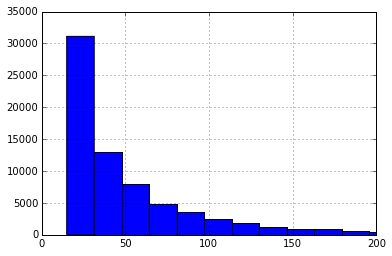

In [151]:
# Create a new variable = TOTAL_DELAY, 
TOTAL_DELAY = Delay_cause['CARRIER_DELAY'] + Delay_cause['WEATHER_DELAY'] + Delay_cause['NAS_DELAY'] + Delay_cause['SECURITY_DELAY'] + Delay_cause['LATE_AIRCRAFT_DELAY']
TOTAL_DELAY_X = TOTAL_DELAY.dropna()
TOTAL_DELAY_X.hist(bins = 100)
plt.xlim([0,200])
#DELAY.describe()
#type(DELAY)
#print(TOTAL_DELAY[isDelay[0]])
#plt.xlim([0,100])

#print(Delay_cause['CARRIER_DELAY'][~NoDelay])

In [203]:
# Create a variable indicate the flight is delay or not (Delay = Any Delay above 0 minutes)
DELAY = np.zeros(np.size(TOTAL_DELAY))
Delay = np.where(TOTAL_DELAY >= 0)
DELAY[Delay] = 1

In [204]:
Origin_Dest = pd.read_csv('Origin_Dest.csv')
Origin_Dest['DELAY'] = DELAY
Origin_Dest.head()

,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,...,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,Unnamed: 19,DELAY
0,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,...,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,NaN,0
1,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,...,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,NaN,0
2,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,...,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,NaN,0
3,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,...,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,NaN,0
4,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,...,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,NaN,1


In [150]:
Origin_Dest.describe()

,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,Unnamed: 19
count,445827.000000,445827.000000,445827.000000,445827.000000,445827.00000,445827.000000,445827.000000,445827.000000,445827.000000,445827.000000,0
mean,12682.120789,1268214.916407,31723.938281,25.724613,55.65243,12681.700924,1268172.929780,31723.664890,25.729274,55.652870,NaN
std,1529.485604,152948.271398,1280.460591,16.752301,26.95134,1529.329960,152932.707154,1280.213952,16.751373,26.949279,NaN
min,10135.000000,1013503.000000,30070.000000,1.000000,1.00000,10135.000000,1013503.000000,30070.000000,1.000000,1.000000,NaN
25%,11292.000000,1129202.000000,30615.000000,12.000000,34.00000,11292.000000,1129202.000000,30615.000000,12.000000,34.000000,NaN
50%,12889.000000,1288903.000000,31453.000000,24.000000,52.00000,12889.000000,1288903.000000,31453.000000,24.000000,52.000000,NaN
75%,14027.000000,1402702.000000,32467.000000,40.000000,82.00000,14027.000000,1402702.000000,32467.000000,40.000000,82.000000,NaN
max,16218.000000,1621801.000000,35991.000000,78.000000,93.00000,16218.000000,1621801.000000,35991.000000,78.000000,93.000000,NaN


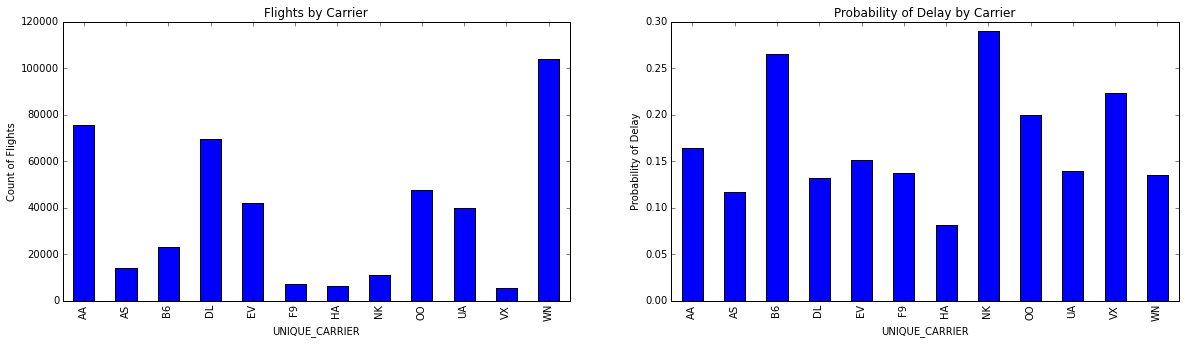

In [224]:
# Here I want to check if any carrier has much higher delay cases compare others. 
# Plot Delay ration based on UNIQUE_CARRIER
temp1 = Origin_Dest.groupby('UNIQUE_CARRIER').DELAY.count()
temp2 = Origin_Dest.groupby('UNIQUE_CARRIER').DELAY.sum()/Origin_Dest.groupby('UNIQUE_CARRIER').DELAY.count()

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('UNIQUE_CARRIER')
ax1.set_ylabel('Count of Flights')
ax1.set_title("Flights by Carrier")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('UNIQUE_CARRIER')
ax2.set_ylabel('Probability of Delay')
ax2.set_title("Probability of Delay by Carrier")

#print(temp1,temp2)

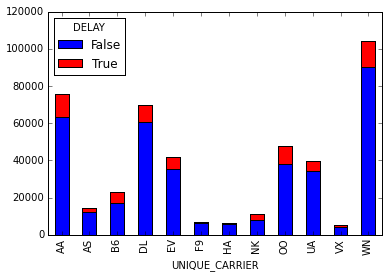

In [230]:
# Stack bar chart
temp3 = pd.crosstab([Origin_Dest.UNIQUE_CARRIER], Origin_Dest.DELAY.astype(bool))
temp3.plot(kind='bar', stacked=True, color=['blue','red'], grid=False)
#print(temp3)

# From the Probablility of Delay chart, the ratio of dalay did not vary much between the carriers, 
# mostly between 10 to 25%. Althrough AA, DL, OO and WN contribute a lot of delays but the ratios 
# are around 10~20% 

In [269]:
DestCityD = Origin_Dest.groupby(['DEST_CITY_NAME']).DELAY.sum()/Origin_Dest.groupby(['DEST_CITY_NAME']).DELAY.count()
DestCityDt = pd.DataFrame(DestCityD)
DestCityDt.sort_index(by=['DELAY'], ascending=[False])

,DELAY
DEST_CITY_NAME,
"Santa Maria, CA",0.354839
"North Bend/Coos Bay, OR",0.352941
"Ponce, PR",0.319444
"La Crosse, WI",0.306122
"Arcata/Eureka, CA",0.304000
"New Bern/Morehead/Beaufort, NC",0.290909
"Aguadilla, PR",0.290698
"Newburgh/Poughkeepsie, NY",0.290323
"San Francisco, CA",0.289641


In [270]:
OrigCityD = Origin_Dest.groupby(['ORIGIN_CITY_NAME']).DELAY.sum()/Origin_Dest.groupby(['ORIGIN_CITY_NAME']).DELAY.count()
OrigCityDt = pd.DataFrame(OrigCityD)
OrigCityDt.sort_index(by=['DELAY'], ascending=[False])

,DELAY
ORIGIN_CITY_NAME,
"North Bend/Coos Bay, OR",0.470588
"Adak Island, AK",0.444444
"Muskegon, MI",0.354839
"Arcata/Eureka, CA",0.344000
"Atlantic City, NJ",0.341935
"Worcester, MA",0.333333
"Cody, WY",0.333333
"Newburgh/Poughkeepsie, NY",0.328358
"Hibbing, MN",0.325301


In [271]:
CarrierD = Origin_Dest.groupby(['UNIQUE_CARRIER']).DELAY.sum()/Origin_Dest.groupby(['UNIQUE_CARRIER']).DELAY.count()
CarrierDt = pd.DataFrame(CarrierD)
CarrierDt.sort_index(by=['DELAY'], ascending=[False])

,DELAY
UNIQUE_CARRIER,
NK,0.290577
B6,0.264923
VX,0.223811
OO,0.199479
AA,0.164647
EV,0.151894
UA,0.140112
F9,0.137766
WN,0.135405


(0, 100)

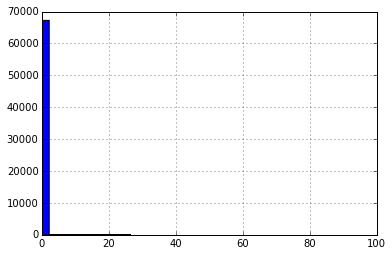

In [142]:
Delay_cause_X = Delay_cause.dropna(thresh=2)
#Delay_cause_X.head()
#Delay_cause_X.shape
Delay_cause_X['WEATHER_DELAY'].hist(bins = 500)
plt.xlim([0,100])

In [11]:
DepP_ArrP = pd.read_csv('DepP_ArrP.csv')
DepP_ArrP.head()

,UNIQUE_CARRIER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,Unnamed: 19
0,AA,1100,1057,-3,0,0,-1,1100-1159,15,1112,1424,8,1438,1432,-6,0,0,-1,1400-1459,NaN
1,AA,1100,1056,-4,0,0,-1,1100-1159,14,1110,1416,10,1438,1426,-12,0,0,-1,1400-1459,NaN
2,AA,1100,1055,-5,0,0,-1,1100-1159,21,1116,1431,14,1438,1445,7,7,0,0,1400-1459,NaN
3,AA,1100,1102,2,2,0,0,1100-1159,13,1115,1424,9,1438,1433,-5,0,0,-1,1400-1459,NaN
4,AA,1100,1240,100,100,1,6,1100-1159,20,1300,1617,14,1438,1631,113,113,1,7,1400-1459,NaN


In [9]:
Flight_summary = pd.read_csv('Flight_summary.csv')
Flight_summary.head()

,UNIQUE_CARRIER,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,Unnamed: 7
0,AA,158,155,132,1,986,4,NaN
1,AA,158,150,126,1,986,4,NaN
2,AA,158,170,135,1,986,4,NaN
3,AA,158,151,129,1,986,4,NaN
4,AA,158,171,137,1,986,4,NaN


ValueError: Can only tuple-index with a MultiIndex

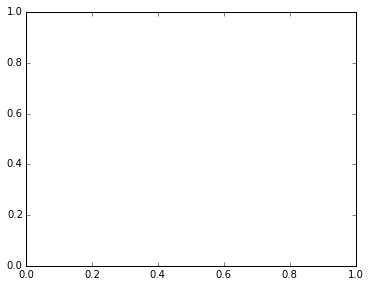

In [93]:
# ELAPSED TIME studies, check out the different between computer reservations systems (CRS) and 
# actual elapsed time

plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
Flight_summary['CRS_ELAPSED_TIME'].hist()
plt.xlabel('CRS_ELAPSED_TIME'), plt.ylabel('Occurrence')
plt.title('CRS_ELAPSED_TIME')
plt.subplot(2,2,2)
Flight_summary['ACTUAL_ELAPSED_TIME'].hist()
plt.xlabel('ACTUAL_ELAPSED_TIME'), plt.ylabel('Occurrence')
plt.title('ACTUAL_ELAPSED_TIME')
plt.subplot(2,2,3)
D_ELAPSED_TIME = Flight_summary['CRS_ELAPSED_TIME'] - Flight_summary['ACTUAL_ELAPSED_TIME']
D_ELAPSED_TIME.hist()
plt.xlabel('D_ELAPSED_TIME'), plt.ylabel('Occurrence')
plt.title('D_ELAPSED_TIME')
plt.subplot(2,2,4)
plt.scatter(Flight_summary['CRS_ELAPSED_TIME'],Flight_summary['ACTUAL_ELAPSED_TIME'])
plt.xlabel('CRS_ELAPSED_TIME'), plt.ylabel('ACTUAL_ELAPSED_TIME')
plt.title('CRS vs. ACTUAL ELAPSED TIME')

(<matplotlib.text.Text at 0x7f61cb9625c0>,
 <matplotlib.text.Text at 0x7f61cb966c88>)

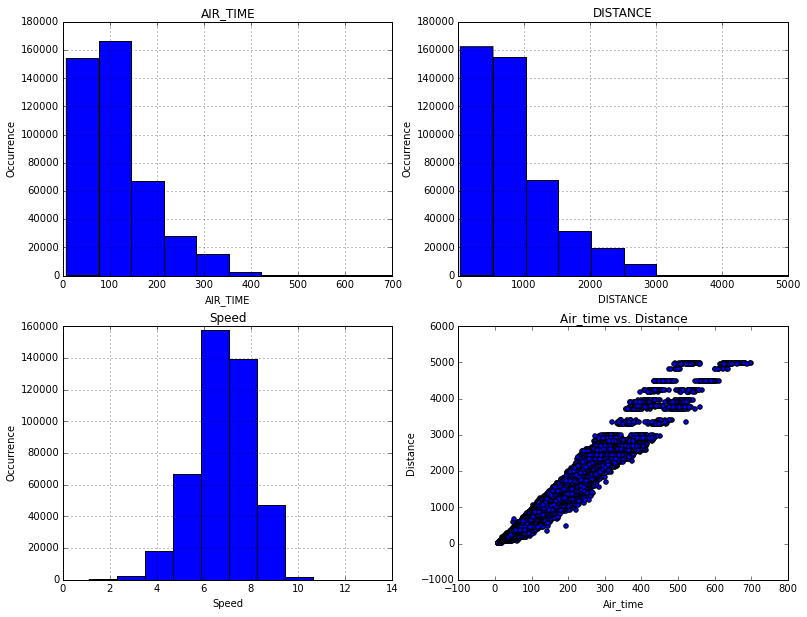

In [52]:
# AIR TIME & DISTANCE study
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
Flight_summary['AIR_TIME'].hist()
plt.xlabel('AIR_TIME'), plt.ylabel('Occurrence')
plt.title('AIR_TIME')
plt.subplot(2,2,2)
Flight_summary['DISTANCE'].hist()
plt.xlabel('DISTANCE'), plt.ylabel('Occurrence')
plt.title('DISTANCE')
plt.subplot(2,2,3)
speed = Flight_summary['DISTANCE']/Flight_summary['AIR_TIME']
speed.hist()
plt.xlabel('Speed'), plt.ylabel('Occurrence')
plt.title('Speed')
plt.subplot(2,2,4)
plt.scatter(Flight_summary['AIR_TIME'],Flight_summary['DISTANCE'])
plt.title('Air_time vs. Distance')
plt.xlabel('Air_time'), plt.ylabel('Distance')